In [81]:
import sqlalchemy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from config import pw

In [6]:
user = "postgres"
password = pw
host = "localhost"
port = "5432" # 5432 for everyone else
db = "EmployeeSQL"
uri = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{db}"

engine = create_engine(uri)

connection = engine.connect()

In [11]:
session = Session(engine)

In [20]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Departments = Base.classes.departments
# Dept_emp = Base.classes.dept_emp
# Dept_manager = Base.classes.dept_manager
Employees = Base.classes.employees
# Salaries = Base.classes.salaries
# Titles = Base.classes.titles

In [23]:
dfdepartments = pd.read_sql_query(session.query(Departments).statement, session.bind)
dfemployees = pd.read_sql_query(session.query(Employees).statement, session.bind)
dfdept_emp = pd.DataFrame(list(engine.execute("SELECT * FROM dept_emp")), columns=["emp_no","dept_no","from_date","to_date"])
dfdept_manager = pd.DataFrame(list(engine.execute("SELECT * FROM dept_manager")), columns=["dept_no","emp_no","from_date","to_date"])
dfsalaries = pd.DataFrame(list(engine.execute("SELECT * FROM salaries")), columns=["emp_no","salary","from_date","to_date"])
dftitles = pd.DataFrame(list(engine.execute("SELECT * FROM titles")), columns=["emp_no","title","from_date","to_date"])

In [36]:
dfmerge1 = pd.merge(dfdept_emp,dfdepartments,on="dept_no").sort_values(["emp_no"])


emp_no       object
dept_no       int64
from_date    object
to_date      object
dtype: object

In [48]:
dfmerge2 = pd.merge(dfmerge1, dfdept_manager,on=["emp_no"],how="outer").sort_values(["emp_no"])
dfmerge2 = dfmerge2.dropna(axis=1)

In [49]:
dfmerge3 = pd.merge(dfmerge2, dfemployees, on="emp_no").sort_values(["emp_no"])

In [51]:
dfmerge4 = pd.merge(dfmerge3, dfsalaries, on="emp_no")

,emp_no,dept_no_x,from_date_x,to_date_x,dept_name,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01,Development,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10002,d007,1996-08-03,9999-01-01,Sales,1964-06-02,Bezalel,Simmel,F,1985-11-21,65828,1996-08-03,1997-08-03
2,10003,d004,1995-12-03,9999-01-01,Production,1959-12-03,Parto,Bamford,M,1986-08-28,40006,1995-12-03,1996-12-02
3,10004,d004,1986-12-01,9999-01-01,Production,1954-05-01,Chirstian,Koblick,M,1986-12-01,40054,1986-12-01,1987-12-01
4,10005,d003,1989-09-12,9999-01-01,Human Resources,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,78228,1989-09-12,1990-09-12
5,10006,d005,1990-08-05,9999-01-01,Development,1953-04-20,Anneke,Preusig,F,1989-06-02,40000,1990-08-05,1991-08-05
6,10007,d008,1989-02-10,9999-01-01,Research,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,56724,1989-02-10,1990-02-10
7,10008,d005,1998-03-11,2000-07-31,Development,1958-02-19,Saniya,Kalloufi,M,1994-09-15,46671,1998-03-11,1999-03-11
8,10009,d006,1985-02-18,9999-01-01,Quality Management,1952-04-19,Sumant,Peac,F,1985-02-18,60929,1985-02-18,1986-02-18
9,10010,d006,2000-06-26,9999-01-01,Quality Management,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,72488,1996-11-24,1997-11-24


In [52]:
dfmerge5 = pd.merge(dfmerge4, dftitles, on="emp_no")

In [57]:
dffinal = dfmerge5[["emp_no","first_name","last_name","dept_no_x","dept_name","salary","title","hire_date","birth_date"]]
dfx = dffinal.group_by()

,emp_no,first_name,last_name,dept_no_x,dept_name,salary,title,hire_date,birth_date
0,10001,Georgi,Facello,d005,Development,60117,Senior Engineer,1986-06-26,1953-09-02
1,10002,Bezalel,Simmel,d007,Sales,65828,Staff,1985-11-21,1964-06-02
2,10003,Parto,Bamford,d004,Production,40006,Senior Engineer,1986-08-28,1959-12-03
3,10004,Chirstian,Koblick,d004,Production,40054,Engineer,1986-12-01,1954-05-01
4,10004,Chirstian,Koblick,d004,Production,40054,Senior Engineer,1986-12-01,1954-05-01
5,10005,Kyoichi,Maliniak,d003,Human Resources,78228,Senior Staff,1989-09-12,1955-01-21
6,10005,Kyoichi,Maliniak,d003,Human Resources,78228,Staff,1989-09-12,1955-01-21
7,10006,Anneke,Preusig,d005,Development,40000,Senior Engineer,1989-06-02,1953-04-20
8,10007,Tzvetan,Zielinski,d008,Research,56724,Senior Staff,1989-02-10,1957-05-23
9,10007,Tzvetan,Zielinski,d008,Research,56724,Staff,1989-02-10,1957-05-23


In [78]:
dfx = dffinal.groupby("title").agg({"salary":["mean"]})
dfx.columns = ['_'.join(col) for col in dfx.columns]
dfx = dfx.reset_index()
dfx

,title,salary_mean
0,Assistant Engineer,48493.463549
1,Engineer,48538.001922
2,Manager,51531.041667
3,Senior Engineer,48505.670837
4,Senior Staff,58496.030422
5,Staff,58459.949530
6,Technique Leader,48572.161678


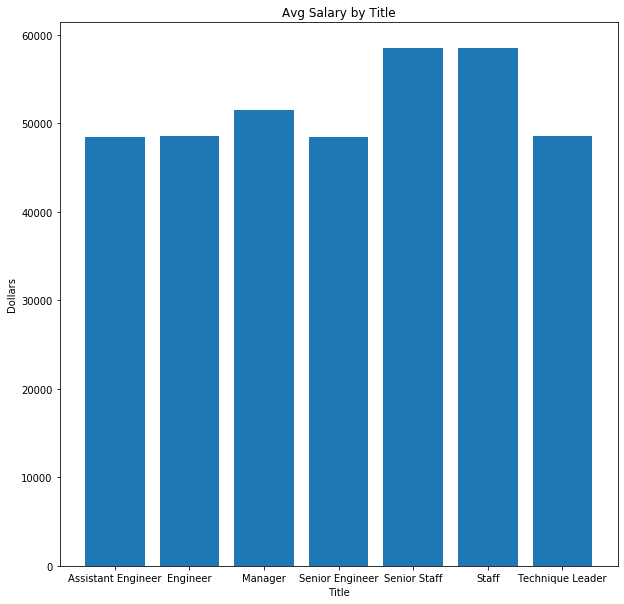

In [93]:
plt.figure(figsize=(10,10))
plt.bar(dfx["title"], dfx["salary_mean"])
plt.ylabel("Dollars")
plt.xlabel("Title")
plt.title("Avg Salary by Title")
plt.show()